### Problem Experiment
This problem experiments for several values of the parameter $\rho$ as well as several initial contitions $(x,y,z)$ where:

$\rho$ is the temperature difference between the top and bottom.

$x$ is the intensity of convective motion

$y$ is the temperature difference between currents

$z$ is the vertical temperature distorion, so zero is a linear temperature gradient and a positive value indicates temperature mixing in the center

#### First using a fixed value of $(5,5,5)$ and modifying the values of $\rho$
The first three plots are when rho is stable. the following plots are for $\rho$ values of 10 and (470/19) the threshold value.

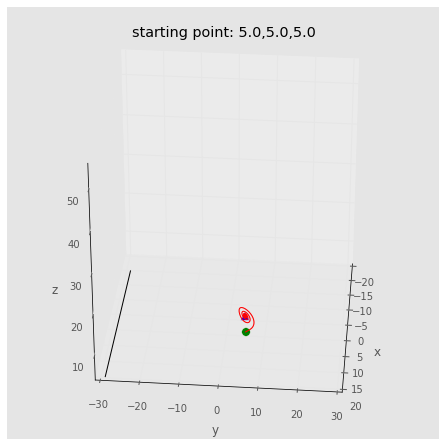

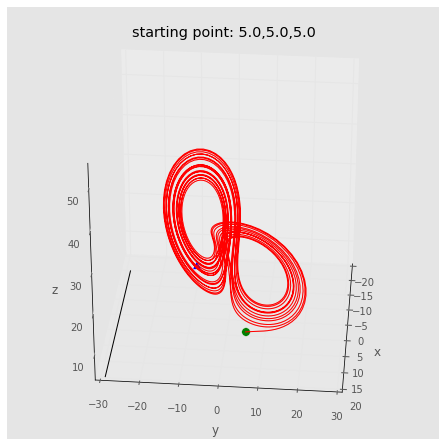

In [8]:
from IPython.display import Image
from IPython.display import display
b = Image(filename='rho10.png')
c = Image(filename='rhostar.png') 
display(b,c)

All the above plots were for stable $\rho$ value. It is seen that the plots stay within the boundries and follow the butterfly pattern. The following plots are when $\rho$ is unstable.

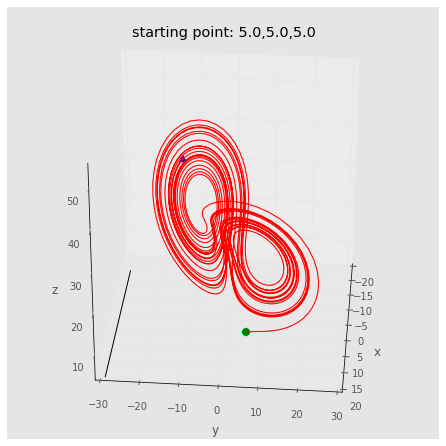

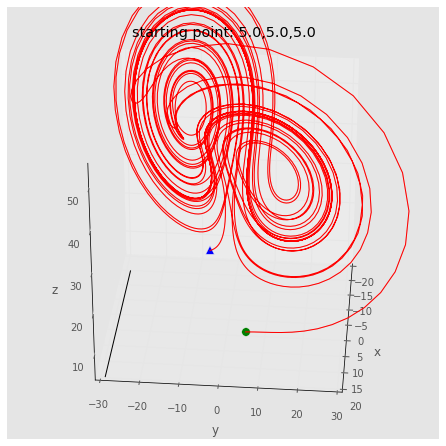

In [7]:
a = Image(filename='rho28.png') 
b = Image(filename='rho50.png')
display(a,b)

When the value of $\rho$ is unstable, especially when the temperature differnece between the cold water boundary and the warm water is 50. At this point the solution does not stay within the bounded region, but does still flip back and fourth to form the butterfly pattern. nothing can be said at this point about the influence of the starting conditions, so now I will fix $\rho$ at 28 and try multiple $(x,y,z)$ values to see how initial values effect the trajectory. 

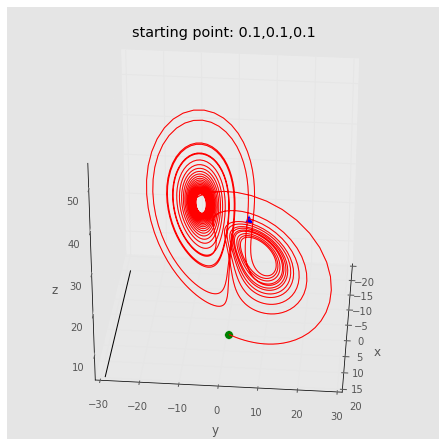

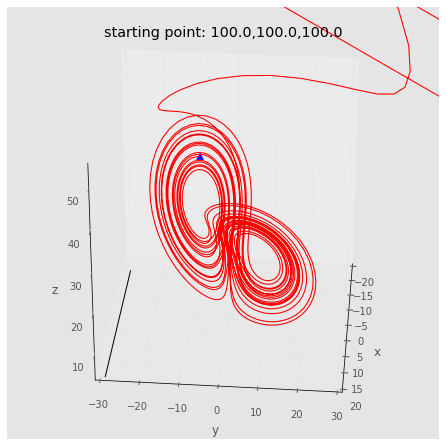

In [11]:
a = Image(filename='lab6-2.png') 
b = Image(filename='lab6-3-1.png')
display(a,b)

I tried several points, for the temperature difference of 28. The most interesting cases were when the initial conditions were $(0,0,0)$, which when plotted had no movement. When the initial conditions where changed slightly to $(0.1,0.1,0.1)$, they eventually converged to a similar butterfly pattern when the initial conditions were $(100,100,100)$

Now to answer all the question in problem experiment, I changed the time step to several values to get an idea of how the behavour changes as t approaches infinity. After several attemps to time steps of up to 5000, it appears that there is definitly an attractor that develops the butterfly pattern

### Problem Adaptive


The code for problem adaptive is below. However I ran this will much higher time steps, which took a while to run. I included the graphs of the run at much higher time steps.

In [14]:

from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None,newdt=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars,newdt)
        
    def set_yinit(self,initvars,uservars,timevars,newdt):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars']['dt']=newdt
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

# create a range of dt values that will be used for the plot
diff = 0.0001
newdt = np.arange(0.001,0.0001-diff,-diff)
#-----------------------------------------------------

# define the solver

elapsedfixed = np.empty_like(newdt)
elapseAdapt = np.empty_like(newdt)

for i in range(0, len(newdt)):
    theSolver = Integ61('lorenz.yaml',newdt=newdt[i])
    tic =time.time()
    timeVals1, yVals1, errorlist1 = theSolver.timeloop5fixed()
    elapsedfixed[i] = time.time() - tic


for i in range(0, len(newdt)):
    theSolver = Integ61('lorenz.yaml',newdt=newdt[i])
    tic =time.time()
    timeVals1, yVals1, errorlist1 = theSolver.timeloop5Err()
    elapseAdapt[i] = time.time() - tic


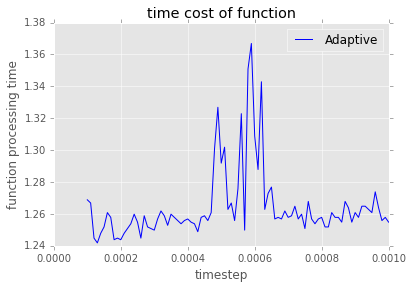

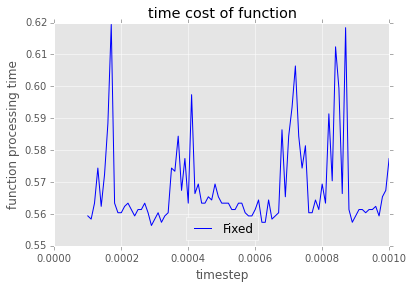

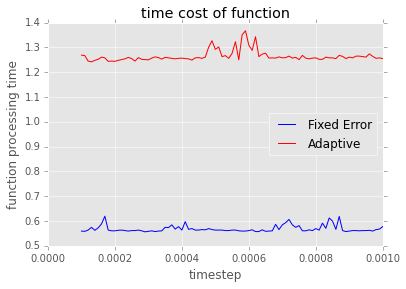

In [18]:
a = Image(filename='adaptive.png') 
b = Image(filename='fixed.png')
c = Image(filename='fixedadapt.png')
display(a,b,c)

It is seen that the adaptive function takes longer to run no matter how small the timesteps are. It is shown above that the adaptive function takes about 0.7 seconds longer to run, making it that more costly to run.